In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.fft import fft, ifft

# Problem 1

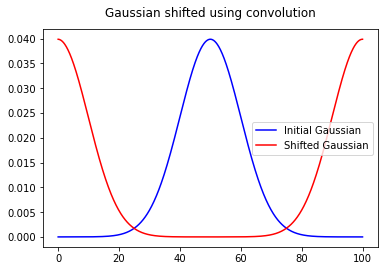

In [12]:
def gaussian(x,mu,sigma):
    ''' Quickly write a function that returns a Gaussian '''
    return 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-(x-mu)**2/(2*sigma**2))


def conv(f, shift, xrange):
    ''' Shift a function f by an amount shift.
    g is a delta function centered on the shift.
    xrange is the range of the x-axis (to find the index of the shift)'''
    
    g = 0*f
    idx = int(np.size(f)/(xrange/shift))  # Get the index corresponding to the shift
    g[idx] = 1
    
    ft1 = fft(f)
    ft2 = fft(g)
    
    return np.real(ifft(ft1*ft2))


#---------- Test it out using a Gaussian centered on the center of some array ----------------------


x = np.linspace(0,100,1001)
mu = np.median(x)  # It is centered on the array midpoint
sigma = 10
gaus = gaussian(x,mu,sigma)

plt.plot(x, gaus, color='blue', label="Initial Gaussian")


#- ------------------ Shift the Gaussian -------------------------------------------------------------


# Define half the array length
xrange = max(x)-min(x)
half = 1/2 * xrange

shifted_gaus = conv(gaus, half, xrange)

plt.plot(x, shifted_gaus, color='red', label="Shifted Gaussian")
plt.legend()
plt.title("Gaussian shifted using convolution",y=1.03)
plt.savefig("gauss_shift.png",dpi=500,bbox_inches='tight')

plt.show()

# Problem 2

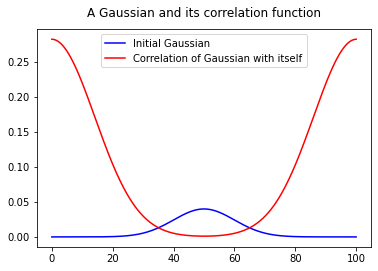

In [11]:
def correlation(f,g):
    ''' Take correlation function of f and g '''
    ft1 = fft(f)
    ft2 = np.conj(fft(g))
    
    return np.real(ifft(ft1*ft2))


# ------------ Take correlation of Gaussian with itself ----------------------------

corr = correlation(gaus,gaus)

plt.plot(x, gaus, color='blue', label="Initial Gaussian")
plt.plot(x, corr, color='red', label="Correlation of Gaussian with itself")
plt.legend()
plt.title("A Gaussian and its correlation function",y=1.03)
plt.savefig("gauss_corr.png",dpi=500,bbox_inches='tight')
plt.show()

# Problem 3

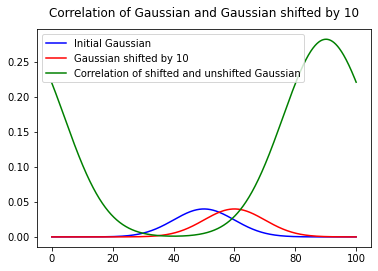

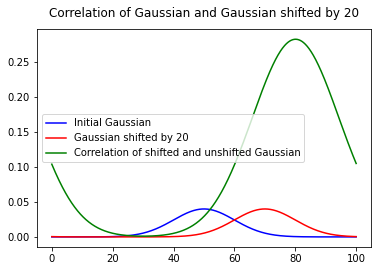

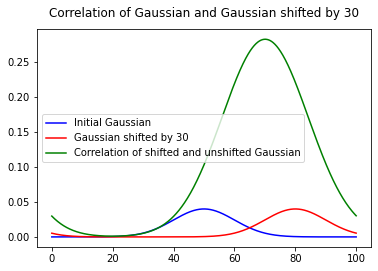

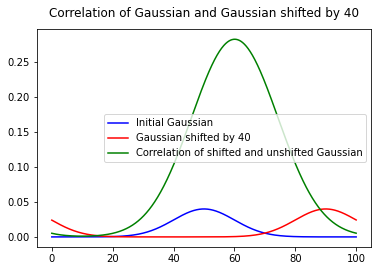

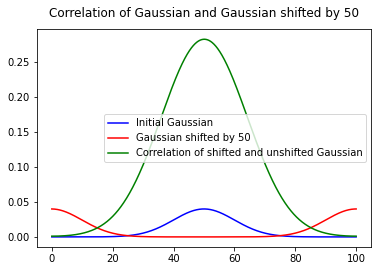

In [15]:
# I don't quite understand what he means by 
# "take the correlation function of a Gaussian (shifted by an arbitrary amount) with itself"
# I'm going to assume he means take the correlation of an UNSHIFTED and a SHIFTED Gaussian

shift = [10,20,30,40,50]  # Shift by a bunch of values

for i in shift:
    
    shifted_gaus = conv(gaus, i, xrange)
    corr_gaus = correlation(gaus, shifted_gaus)
    
    plt.plot(x, gaus, color='blue', label="Initial Gaussian")
    plt.plot(x, shifted_gaus, color='red', label=f"Gaussian shifted by {i}")
    plt.plot(x, corr_gaus, color='green', label="Correlation of shifted and unshifted Gaussian")
    plt.title(f"Correlation of Gaussian and Gaussian shifted by {i}",y=1.03)
    plt.legend()
    plt.show()
    

As the shift moves rightward, the correlation moves leftward. The correlation is centered on the initial Gaussian when the shift reaches half the array length. I think this surprises me?

# Problem 4